In [17]:
'''This example demonstrates the use of Convolution1D for text classification.

Gets to 0.89 test accuracy after 2 epochs.
90s/epoch on Intel i5 2.4Ghz CPU.
10s/epoch on Tesla K40 GPU.

'''

from __future__ import print_function

import tensorflow.contrib.keras.api.keras as K
from tensorflow.contrib.keras.api.keras.preprocessing import sequence
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Dropout, Activation
from tensorflow.contrib.keras.api.keras.layers import Embedding
from tensorflow.contrib.keras.api.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.contrib.keras.api.keras.datasets import imdb

# set parameters:
LOGDIR = "data-keras-imdb-cnn/"

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback_tensorboard = K.callbacks.TensorBoard(log_dir=LOGDIR, embeddings_freq=1, embeddings_metadata='imdb_metadata_5k.tsv')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[callback_tensorboard])

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 19s - loss: 0.7015 - acc: 0.4949 - val_loss: 0.6933 - val_acc: 0.5004
Epoch 2/2
25000/25000 [==============================] - 19s - loss: 0.6932 - acc: 0.5018 - val_loss: 0.6933 - val_acc: 0.4999


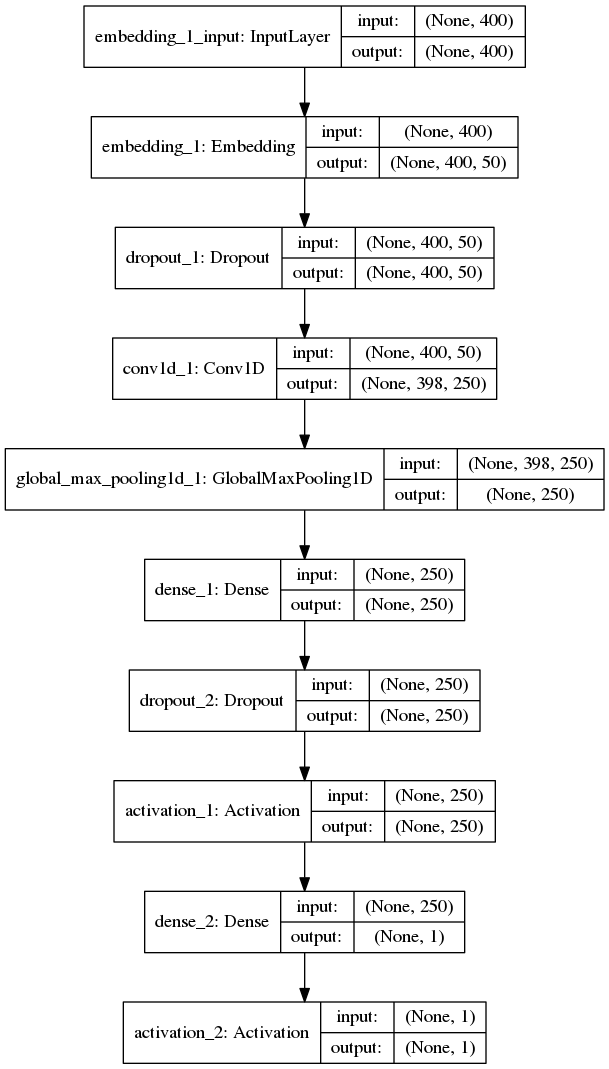

In [2]:
onstrates the use of Convolution1D for text classification.
Gets to 0.89 test accuracy after 2 epochs.
90s/epoch on Intel i5 2.4Ghz CPU.
10s/epoch on Tesla K40 GPU.import tensorflow.contrib.keras.api.keras as K
import IPython

LOGDIR = "data-keras-imdb-cnn/"
K.utils.plot_model(model, to_file=LOGDIR + "keras-imdb-cnn-model.png", show_shapes=True)

IPython.display.Image(filename=LOGDIR + "keras-imdb-cnn-model.png")

In [11]:
metadata = imdb.get_word_index()
print(metadata)

{'gyrations': 60764, 'shamrock': 40759, 'roughnecks': 86846, 'albacore': 72541, 'deterr': 83977, 'pro': 3345, 'feedbacks': 36805, 'cunninghams': 60275, 'boneheaded': 32307, 'ramme': 54859, 'phasered': 72582, "'symphony": 45831, 'brute': 11088, 'intention': 3421, 'wise': 1564, "sammo's": 23747, 'är': 41000, 'criticize': 7097, "ferroukhi's": 42121, 'guignol': 21391, 'himalaya': 74971, 'designed': 2426, 'parting': 15399, 'liggin': 87880, 'bekhti': 59326, 'edinburgh': 12177, 'catboy': 53946, 'cardboard': 3437, 'solvency': 53836, 'inextricably': 37026, 'jai': 15213, 'jörg': 34300, 'onscreen': 16517, 'veered': 37328, "judy's": 32431, "timer's": 72318, 'dating': 4104, 'televangelist': 40546, 'xtian': 39179, 'ejames6342': 59037, 'tackling': 16227, 'vllad': 71618, 'condemnatory': 42629, 'chews': 11507, 'chiller': 11022, 'measurement': 79722, 'helper': 15481, "'anti'": 82000, 'beatin': 70231, 'hurter': 72497, 'dissociates': 66044, "'stamp": 59365, "hancock's": 64534, "doophus's": 70213, 'recolle

In [16]:
import csv
with open(LOGDIR + "imdb_metadata.csv", 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in metadata.items():
        writer.writerow([key, value])